In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import time
import math

% matplotlib inline

## Overdamped Broawnian motion

Particle in a potential well separated by barrier $V_0$ and located at $+/- x_0$. Drag or friction coefficient is $\gamma$ and the Langevin force is $\zeta$:

$$
\gamma \frac { d x ( t ) } { d t } = \frac { 4 V _ { 0 } } { x _ { 0 } } \left( \frac { x } { x _ { 0 } } \right) \left[ 1 - \left( \frac { x } { x _ { 0 } } \right) ^ { 2 } \right] + \zeta ( t )
$$


where at $k_B T$: 
$$
\left\langle \zeta ( t ) \zeta \left( t ^ { \prime } \right) \right\rangle = 2 \gamma k _ { B } T \delta \left( t - t ^ { \prime } \right)
$$

In [2]:
V0 = 10  #height of barrier
x0 = 5  #+/- minimum location
dt = 0.1  #time steps
T = 1000  #total time

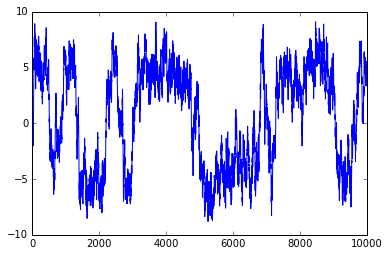

In [3]:
#test
gamma = 10
kBT = 10
x = np.zeros(int(T/dt))
for nn in range(0,len(x)-1):
    x[nn+1] = x[nn] + (1/gamma)*4*V0/x0*(x[nn]/x0)*(1-(x[nn]/x0)**2)*dt + np.sqrt(dt*2*kBT/gamma)*np.random.randn()
plt.plot(x[:50000])  #plot part of the trace

/Users/Macintosh/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  from ipykernel import kernelapp as app


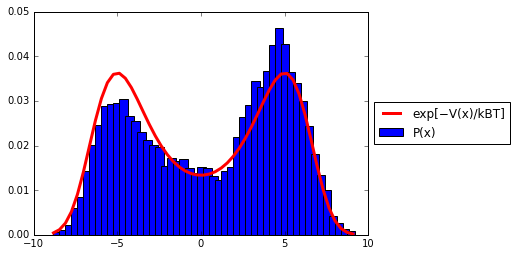

In [4]:
#check Boltzman~
pp,xx = np.histogram(x,normed=True,bins=50);  #turning y back to x by multiplying x0

Pb = np.exp(-(1-(xx/x0)**2)**2)#np.exp(-V0*(1-(xx/x0)**2)**2/kBT)
Pb = Pb/np.sum(Pb)
plt.plot(xx,Pb,'r',linewidth=3,label='exp[−V(x)/kBT]')
plt.hold(True)
#plt.hist(y_SDE(alpha,EE,dt,T)*x0,label=str(EE),normed=True);
plt.bar(xx[:-1],pp/sum(pp),width=.5,label='P(x)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Biased energy landscape

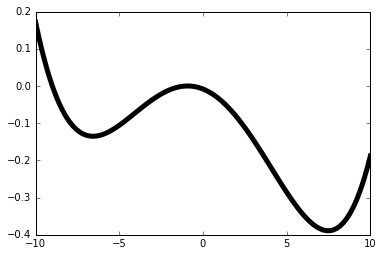

In [15]:
xx = np.linspace(-10,10,100)
bb = 0.9
x0 = 10
y1 = ((xx+bb)/x0)**2
y2 = (xx/x0)**4
plt.plot(xx,-y1+y2,linewidth=5,color='k')

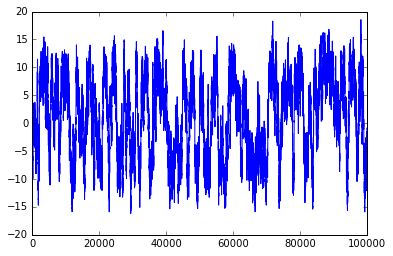

In [8]:
T = 10000  #total time
gamma = 10
kBT = 10
x = np.zeros(int(T/dt))
for nn in range(0,len(x)-1):
    #x[nn+1] = x[nn] + (1/gamma)*4*V0/x0*(((x[nn]-bb)/x0)-(x[nn]/x0)**3)*dt + np.sqrt(dt*2*kBT/gamma)*np.random.randn()
    x[nn+1] = x[nn] + (1/gamma)*((2*(x[nn]+bb)/x0)-4*(x[nn]/x0)**3)*dt + np.sqrt(dt*2*kBT/gamma)*np.random.randn()
plt.plot(x)  #plot part of the trace

/Users/Macintosh/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  from ipykernel import kernelapp as app


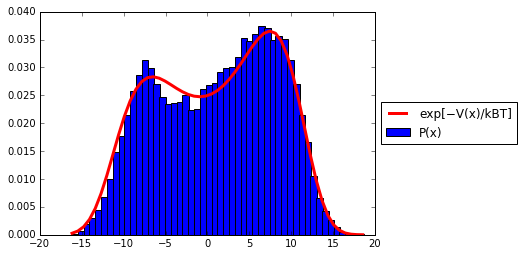

In [9]:
#check Boltzman~
pp,xx = np.histogram(x,normed=True,bins=50);  #turning y back to x by multiplying x0

Pb = np.exp((((xx+bb)/x0)**2-(xx/x0)**4)/kBT*gamma)#np.exp(-V0*(1-(xx/x0)**2)**2/kBT)
Pb = Pb/np.sum(Pb)
plt.plot(xx,Pb,'r',linewidth=3,label='exp[−V(x)/kBT]')
plt.hold(True)
#plt.hist(y_SDE(alpha,EE,dt,T)*x0,label=str(EE),normed=True);
plt.bar(xx[:-1],pp/sum(pp),width=.8,label='P(x)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))